# DSCI 100 Term Project: Final Report


## Introduction 
---

### Contributors (Group 010-5)

- Abdullah Al Zahid — 58730219
- Benson Huang — 21936661
- Katja Radovic-Jonsson — 39575964
- Millie Sun — 19927367

### Purpose
This project revolves around data collected by a research group in Computer Science at UBC, led by Frank Wood, surrounding how people play video games. The research team has set up a Minecraft server—which they call PLAICraft—that records players' actions as they navigate through the world. This project seeks to analyze the team's data to assist the researchers in targeting their recruitment efforts to the right audiences.

### Question

In this project, we are analyzing the data to answer the question: **Can a player's age predict the number of hours they spend playing PLAIcraft?**

### Analyzing the Dataset

To answer this question, we will be using data from the provided `players.csv` data set—specifically, we will need the `Age` and `played_hours` variables.

First, we load in the data.

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players <- read_csv("https://raw.githubusercontent.com/katjarj/dsci-100-project/refs/heads/main/players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Observing the `players.csv` data frame, we see that is has the following characteristics:

**Rows (observations):** 196 

**Columns (variables):** 7 

**Variable names:** 
- `experience` \<chr>: the level of Minecraft experience of the player
- `subscribe` \<lgl>: whether the player is subscribed
- `hashedEmail` \<chr>: a unique token given to the user based on their email
- `played_hours` \<dbl>: number of hours played
- `name` \<chr>: player's name
- `gender` \<chr>: player's gender
- `Age` \<dbl>: player's age

**Potential issues:**
- The `experience` column is a subjective measure of how advanced the player is—we don't know how accurate the values are.
- We don't know the order in which the experience categories are sorted. For example, does Pro come before Veteran? We have no way of knowing.
- There are some missing values in the `Age` data, which I will have to remove for my calculations.

We can now compute summary statistics on each of the numeric columns, removing NA values as needed:

In [4]:
summary_stats_players <- players |>
    summarize(avg_played_hours = mean(played_hours),
              max_played_hours = max(played_hours),
              min_played_hours = min(played_hours),
              avg_age = mean(Age, na.rm = TRUE),
              max_age = max(Age, na.rm = TRUE),
              min_age = min(Age, na.rm = TRUE))
summary_stats_players

avg_played_hours,max_played_hours,min_played_hours,avg_age,max_age,min_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.845918,223.1,0,20.52062,50,8


We can now see that the mean, maximum, and minimum values of `played_hours` are 5.845918, 223.1, and 0, respectively.

## Methods
---

In order to understand how we need to analyze the data, we need to clean and wrangle the data and perform an exploratory analysis on it.

### Wrangling

We begin by wrangling the data such that it can be easily visualized and analyzed.

In [5]:
players_wrangled <- players |>
    rename(age = Age) |>
    drop_na()
head(players_wrangled)

experience,subscribe,hashedEmail,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


We did this by renaming `Age` to `age` for better consistency, and omitting NA values in the data.

The `players.csv` data is now ready for visualization.

### Exploratory Visualization

To explore this data set, we created a scatter plot of the players' ages and their respective time spent playing the game.

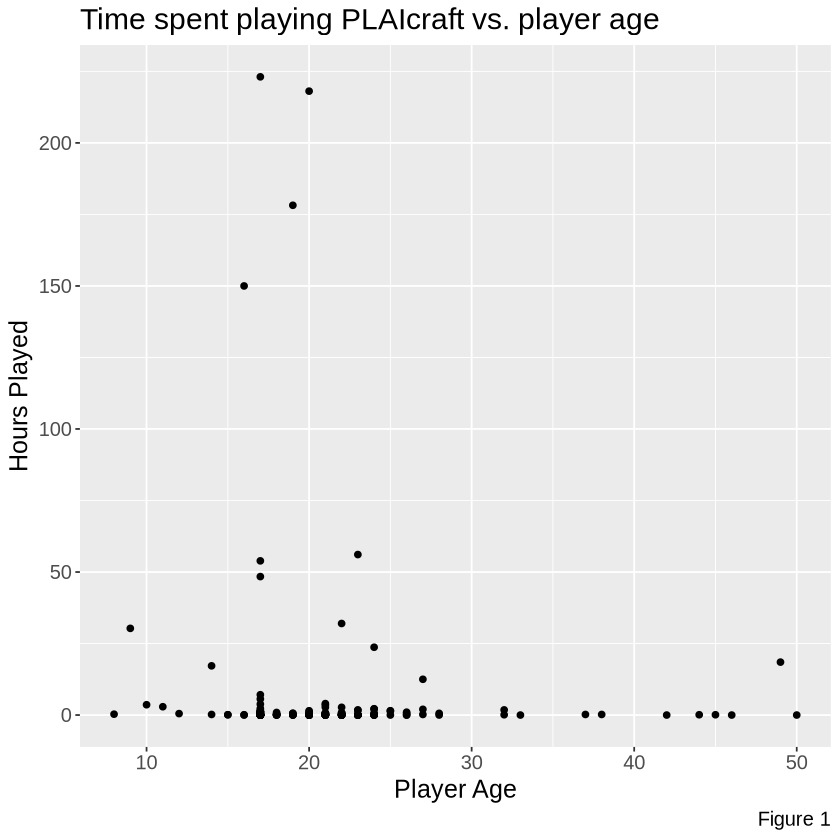

In [6]:
players_plot <- players_wrangled |>
    ggplot(aes(x = age, y = played_hours)) +
    geom_point() +
    xlab("Player Age") +
    ylab("Hours Played") +
    labs(caption = "Figure 1") +
    ggtitle("Time spent playing PLAIcraft vs. player age") +
    theme(text = element_text(size = 15))
players_plot

We can see from Figure 1 that there is a large spike in the number of hours played somewhere between ages 15 and 20. 

We also created a histogram of the distribution of player ages across the data set, which gives us a better idea of how the data is skewed.

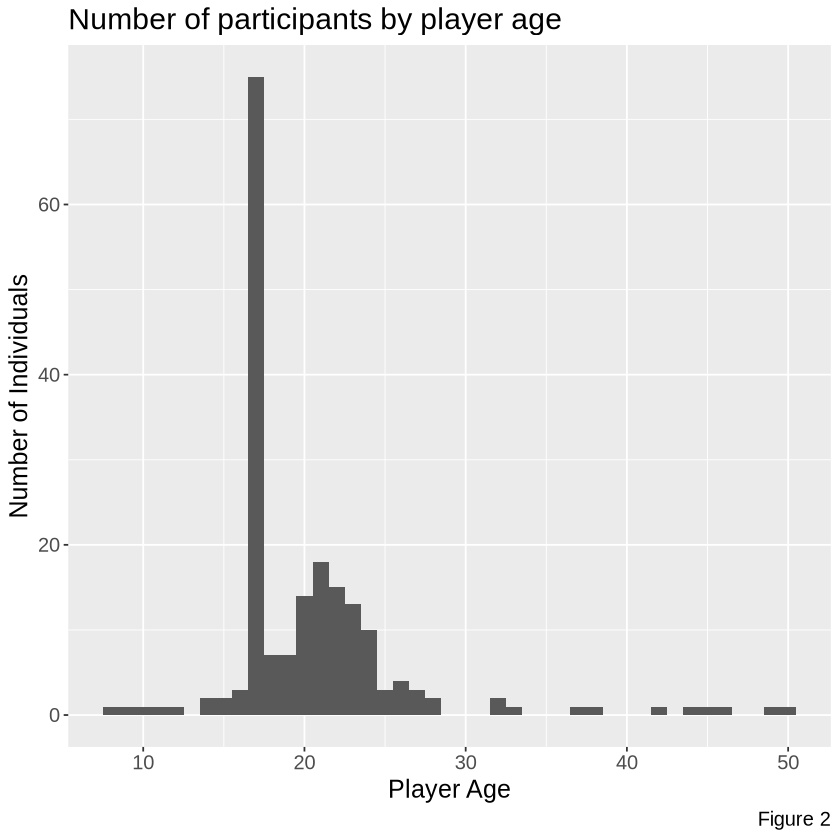

In [7]:
players_hist <- players_wrangled |>
    ggplot(aes(x = age)) +
    geom_histogram(binwidth = 1) +
    xlab("Player Age") +
    ylab("Number of Individuals") +
    labs(caption = "Figure 2") + 
    ggtitle("Number of participants by player age") +
    theme(text = element_text(size = 15))
players_hist

Figure 2 tells us that there is significantly more data from users around the age of 17. This is something we may need to consider when performing our data analysis.

### Data Analysis

Analysis text begins here!

In [8]:
# Install packages
library(kknn)
library(gridExtra)
library(tidymodels)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ scales::discard()    masks purrr::discard()
✖ dplyr::filter()      masks stats::filter()
✖ recipes::fixed()     masks stringr::fixed()
✖ dplyr::lag()         masks stats::lag()
✖ yardstick::spec()    masks readr::spec()
✖ recipes::step()      masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



In [9]:
# Set seed for reproducibility
set.seed(123)


# Step 1: Data Preparation
# Select only the relevant columns from the cleaned data
players_clean <- select(players_wrangled, played_hours, age)

# Step 2: Data Splitting
# Split data into training (75%) and testing (25%) sets.
# Stratify by played_hours to maintain a similar distribution in both sets.
player_split <- initial_split(players_clean, prop = 0.75, strata = played_hours)
player_train <- training(player_split)
player_test <- testing(player_split)


# Step 3: Preprocessing Recipe
# Create a recipe to preprocess the data.
# Here we center and scale the predictor 'age'.
player_recipe <- recipe(played_hours ~ age, data = player_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# Step 4: Model Specification with Tuning
player_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

# Step 5: Resampling Strategy
player_vfold <- vfold_cv(player_train, v = 5, strata = played_hours)

# Step 6: Create Workflow
player_wkflw <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(player_spec)

player_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [10]:
# Step 7: Model Tuning
gridvals <- tibble(neighbors = seq(from = 1, to = 110, by = 3))

# Collect RMSE metrics from tuning results
player_results <- player_wkflw |>
  tune_grid(resamples = player_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

player_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,20.06239,5,8.929273,Preprocessor1_Model01
4,rmse,standard,19.64701,5,9.119005,Preprocessor1_Model02
7,rmse,standard,21.93975,5,8.424576,Preprocessor1_Model03
10,rmse,standard,21.43437,5,8.461320,Preprocessor1_Model04
13,rmse,standard,20.99319,5,8.635296,Preprocessor1_Model05
16,rmse,standard,21.17683,5,8.516520,Preprocessor1_Model06
19,rmse,standard,20.87253,5,8.624163,Preprocessor1_Model07
22,rmse,standard,20.83291,5,8.610842,Preprocessor1_Model08
25,rmse,standard,20.75991,5,8.627003,Preprocessor1_Model09


In [11]:
# show only the row of minimum RMSPE
player_min <- player_results |>
  filter(mean == min(mean))

player_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
4,rmse,standard,19.64701,5,9.119005,Preprocessor1_Model02


In [12]:
# Extract the best number of neighbors (k) that minimizes the RMSE
kmin <- player_min |> pull(neighbors)

# Step 8: Final Model Training
player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
  set_engine("kknn") |>
  set_mode("regression")

# Fit the final workflow on the training data
player_fit <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(player_spec) |>
  fit(data = player_train)

# Step 9: Model Evaluation on Test Data
player_summary <- player_fit |>
  predict(player_test) |>
  bind_cols(player_test) |>
  metrics(truth = played_hours, estimate = .pred) |>
  filter(.metric == 'rmse')

player_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,33.78759


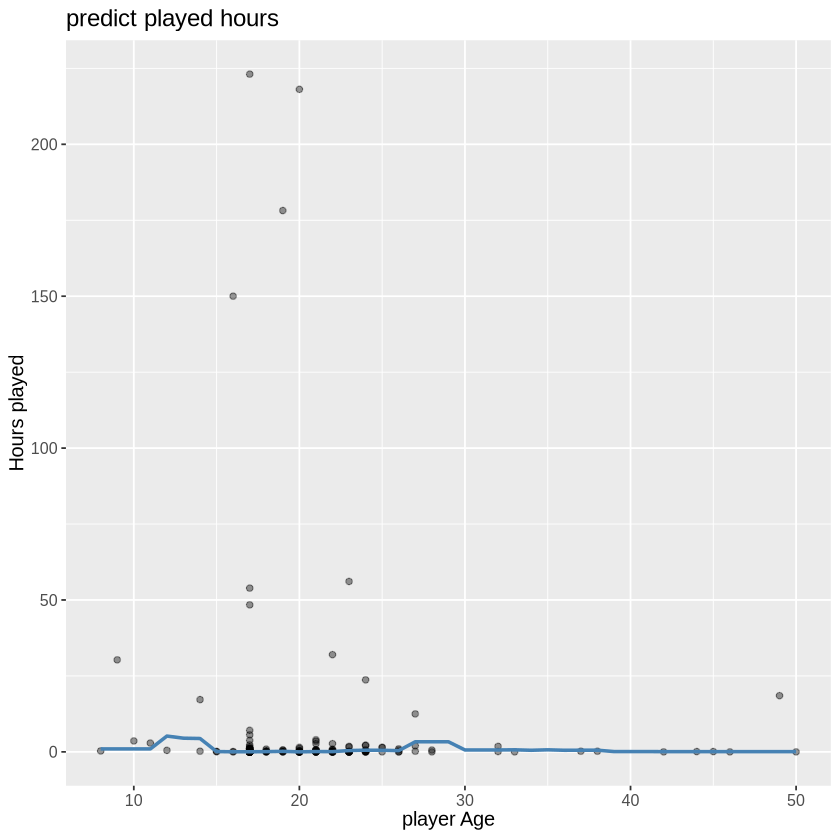

In [16]:
# Step 10: Generate Prediction Grid for Visualization
played_hours_prediction_grid <- tibble(
    age = seq(
        from = players_clean |> pull(age) |> min(na.rm = TRUE),
        to = players_clean |> pull(age) |> max(na.rm = TRUE),
    )
)

player_preds <- player_fit |>
  predict(played_hours_prediction_grid) |>
  bind_cols(played_hours_prediction_grid)

# Step 11: Plot Actual Data and Predictions
plot_final <- ggplot(players_clean, aes(x = age, y = played_hours)) +
  geom_point(alpha = 0.4) +
  geom_line(data = player_preds,
            mapping = aes(x = age, y = .pred),
            color = "steelblue",
            linewidth = 1) +
  xlab("player Age") +
  ylab("Hours played") +
  ggtitle("predict played hours") +
  theme(text = element_text(size = 12))

plot_final

ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: git log
        ^
